<a href="https://colab.research.google.com/github/angel870326/Hierarchical-Clustering/blob/main/hierarchical_clustering_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hierarchical Clustering**

In [1]:
import numpy as np
import pandas as pd
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [2]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


##**1. Text Clustering**

###**1.1 Read file**


---



In [3]:
data = pd.read_csv('/content/gdrive/Shareddrives/Capstone/最終資料檔/Text Clustering/building_tm.csv')

# Number of observations and variables
print(data.shape)
# Overview dataset
data.describe()

(18196, 13)


,c0101,c0114,c0129,c0162,age_Category,c0121_Category,c0106_new,c0118_new,c0179_new,c0123_new,c0122_new,c0158_new,city
count,18196,13047,16284,18196,18196,18196,17776,18196,18196,11726,18196,18196,18196
unique,18196,45,5,2,9,4,8,4,2,3,2,2,8
top,0000001,南,24小時,重點,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨單線道,有平面車位,無機械車位,臺北市
freq,1,2376,12048,9752,3935,8117,16762,6477,13033,8937,11268,14205,5554


###**1.2 Data preprocessing**


---



####***1.2.1 Concatenate cells(features) into a string with separator (ignore NA)***




In [4]:
df = pd.DataFrame(data.c0101)
df['content'] = data.iloc[:,1:].apply(lambda x: ','.join(x.dropna().values.tolist()), axis=1)
labels = np.array(df['c0101'])
df

,c0101,content
0,0000001,"西南,24小時,重點,三十一年至三十五年屋齡,少戶數,鋼筋混凝土,小公設比,近一年有實價登錄..."
1,0000008,"西南,24小時,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年無實價登錄,..."
2,0000010,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼骨鋼筋混凝土,小公設比,近一年有實價..."
3,0000011,"西南,日間管理,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,..."
4,0000012,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼筋混凝土,中公設比,近一年無實價登錄..."
...,...,...
18191,Y001265,"南,24小時,重點,十一年至十五年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多..."
18192,Y001266,"北,24小時,重點,六年至十年屋齡,多戶數,鋼筋混凝土,大公設比,近一年有實價登錄,有平面車..."
18193,Y001273,"西,24小時,重點,十一年至十五年屋齡,極少戶數,鋼筋混凝土,大公設比,近一年無實價登錄,有..."
18194,Y001276,"24小時,一般,十一年至十五年屋齡,極少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多線..."


####***1.2.2 Tf-idf vectorizer***


In [5]:
# text contents in dataframe to array
contents = np.array(df['content']) 
contents

# tfidf vectorizer
vectorizer = TfidfVectorizer() 
tfidf_matrix = vectorizer.fit_transform(contents)

# See the first vector (optional)
first_vector = tfidf_matrix[0]
first_dict = pd.DataFrame(first_vector.T.todense(), index = vectorizer.get_feature_names(), columns = ["tfidf"])

# See all terms
terms = vectorizer.get_feature_names()
print("Terms: ",terms)

# Store vectorized texts in df
df['tfidf'] = list(tfidf_matrix.toarray())
df

Terms:  ['24小時', '一般', '三十一年至三十五年屋齡', '三十六年至四十年屋齡', '中公設比', '二十六年至三十年屋齡', '二十年至二十五年屋齡', '五年內屋齡', '六年至十年屋齡', '其他', '其他管理形式', '加強磚造', '十一年至十五年屋齡', '十六年至二十年屋齡', '四十年以上屋齡', '多戶數', '多方位', '夜間管理', '大公設比', '小公設比', '少戶數', '新北市', '新竹市', '新竹縣', '日間管理', '有平面車位', '有機械車位', '東北', '東南', '桃園市', '極多戶數', '極少戶數', '無平面車位', '無機械車位', '無管理', '磚造', '臨單線道', '臨多線道', '臨雙線道', '臺中市', '臺北市', '臺南市', '西北', '西南', '近一年有實價登錄', '近一年無實價登錄', '重點', '鋼筋混凝土', '鋼骨', '鋼骨鋼筋混凝土', '鐵筋混凝土', '零公設比', '預鑄', '高雄市']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,c0101,content,tfidf
0,0000001,"西南,24小時,重點,三十一年至三十五年屋齡,少戶數,鋼筋混凝土,小公設比,近一年有實價登錄...","[0.18752695929632016, 0.0, 0.474967137800667, ..."
1,0000008,"西南,24小時,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年無實價登錄,...","[0.19834062531585014, 0.2482541806418836, 0.0,..."
2,0000010,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼骨鋼筋混凝土,小公設比,近一年有實價...","[0.14704310415879734, 0.0, 0.0, 0.0, 0.0, 0.26..."
3,0000011,"西南,日間管理,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,...","[0.0, 0.23457981007404105, 0.0, 0.0, 0.2697681..."
4,0000012,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼筋混凝土,中公設比,近一年無實價登錄...","[0.1695757006148546, 0.0, 0.0, 0.0, 0.24408920..."
...,...,...,...
18191,Y001265,"南,24小時,重點,十一年至十五年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多...","[0.20949189482883854, 0.0, 0.0, 0.0, 0.3015450..."
18192,Y001266,"北,24小時,重點,六年至十年屋齡,多戶數,鋼筋混凝土,大公設比,近一年有實價登錄,有平面車...","[0.20885027275118728, 0.0, 0.0, 0.0, 0.0, 0.0,..."
18193,Y001273,"西,24小時,重點,十一年至十五年屋齡,極少戶數,鋼筋混凝土,大公設比,近一年無實價登錄,有...","[0.228797366870728, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
18194,Y001276,"24小時,一般,十一年至十五年屋齡,極少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多線...","[0.1961306618175806, 0.2454880671609076, 0.0, ..."


###**1.3 Cosine Similarity & Distance**


---


In [6]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print

<function print>

###**1.4 Hierarchical Clustering**


---


In [7]:
from scipy.cluster.hierarchy import fcluster, single, complete, average, ward, dendrogram

####***1.4.1 Single-Link***

In [8]:
# linkage_matrix_single = single(dist)

# plot
# plt.subplots(figsize=(15, 20))
# plt.title('Hierarchical Clustering - Single-Link', fontsize=20)
# dn_single = dendrogram(linkage_matrix_single, orientation="right", labels=labels);
# plt.savefig('/content/gdrive/My Drive/碩一下/Capstone/cluster_single.png', dpi=200)

####***1.4.2 Complete-Link***


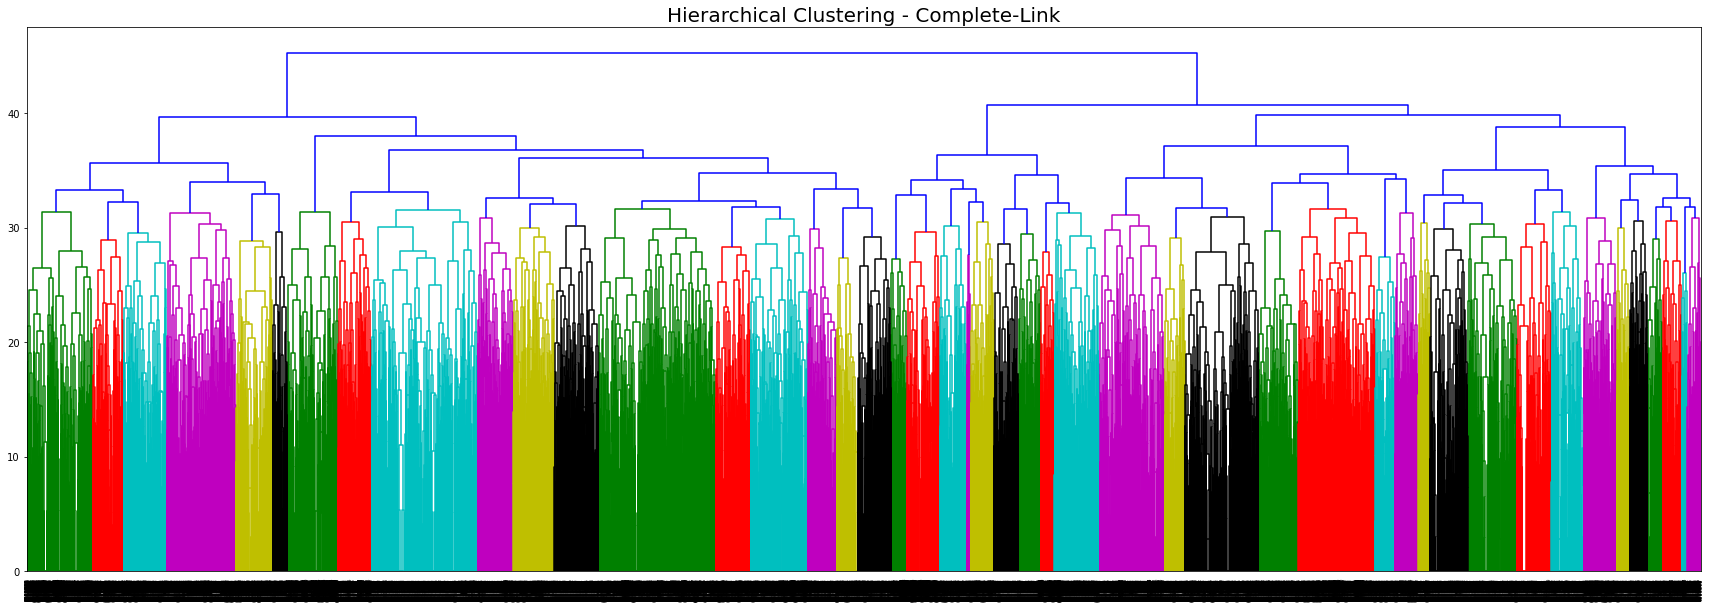

In [9]:
linkage_matrix_complete = complete(dist)

# plot
plt.subplots(figsize=(30, 10)) # set size
plt.title('Hierarchical Clustering - Complete-Link', fontsize=20)
dn_complete = dendrogram(linkage_matrix_complete, labels=labels);
plt.savefig('/content/gdrive/My Drive/碩一下/Capstone/cluster_complete.png', dpi=200)

####***1.4.3 Group Average***


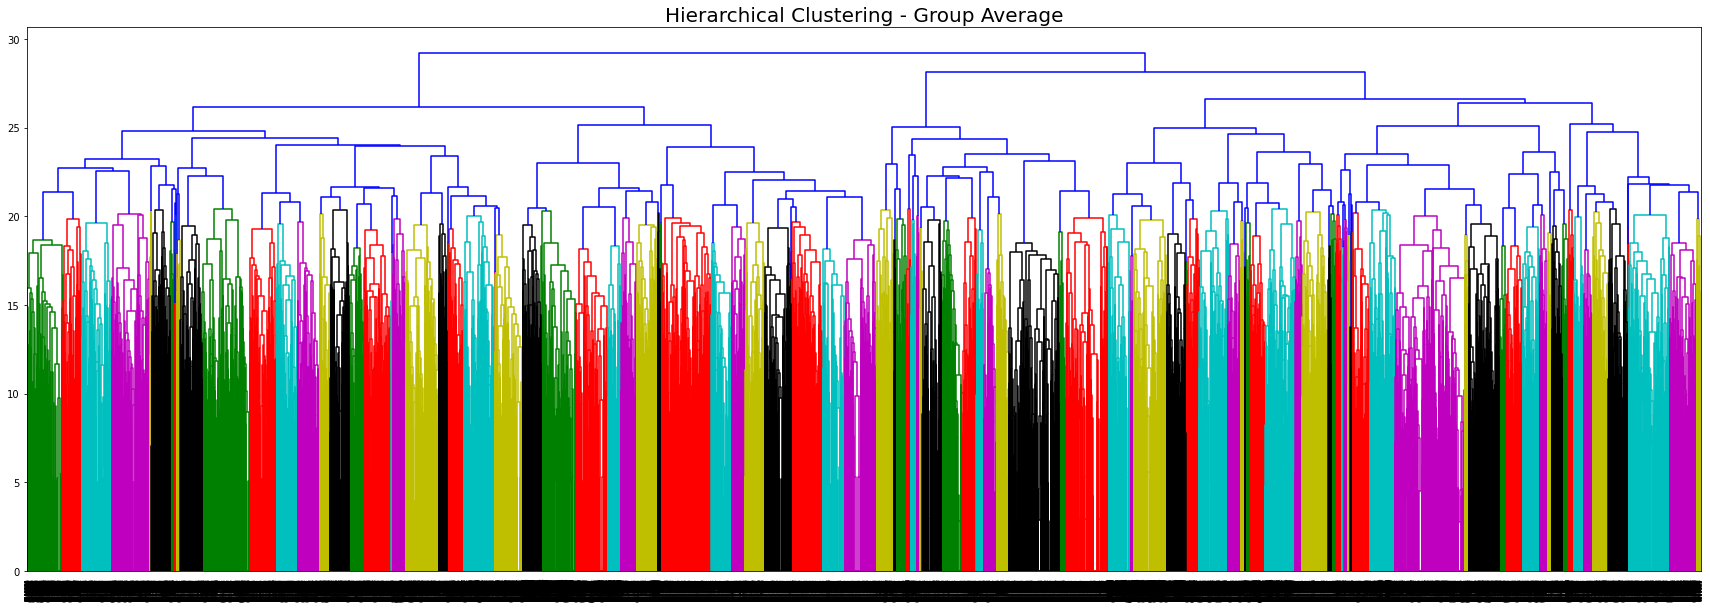

In [11]:
linkage_matrix_avg = average(dist)

# plot
plt.subplots(figsize=(30, 10)) # set size
plt.title('Hierarchical Clustering - Group Average', fontsize=20)
dn_avg = dendrogram(linkage_matrix_avg, labels=labels);
plt.savefig('/content/gdrive/My Drive/碩一下/Capstone/cluster_avg.png', dpi=200)

####***1.4.4 Ward***


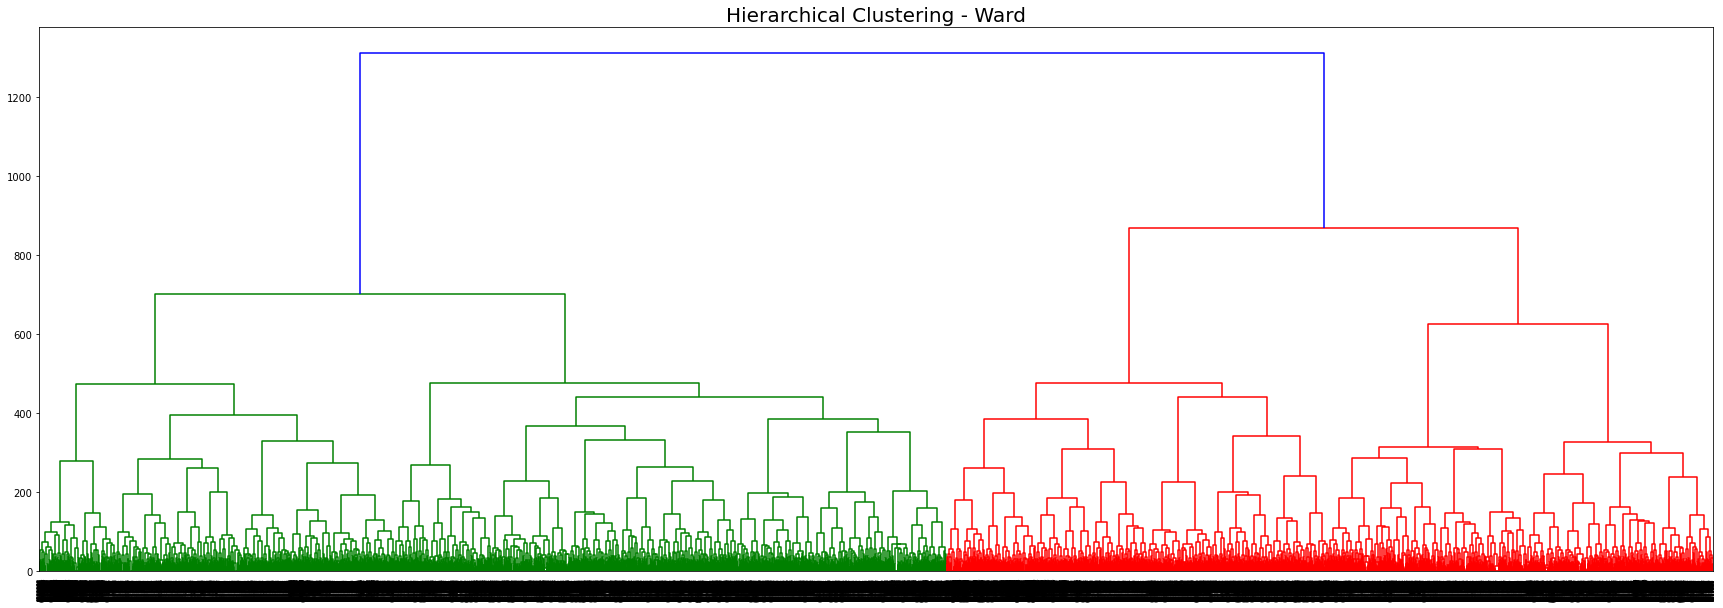

In [12]:
linkage_matrix_ward = ward(dist) 

# plot
plt.subplots(figsize=(30, 10)) # set size
plt.title('Hierarchical Clustering - Ward', fontsize=20)
dn_ward = dendrogram(linkage_matrix_ward, labels=labels);
plt.savefig('/content/gdrive/My Drive/碩一下/Capstone/cluster_ward.png', dpi=200)

####***1.4.5 Set a threshold***


In [13]:
# Set a threshold
k = 3
kc = 5

# Single-link
# cluster_single = fcluster(linkage_matrix_single,k,criterion='maxclust')
# df['cluster_single'] = cluster_single

# Complete-link
cluster_complete = fcluster(linkage_matrix_complete,kc,criterion='maxclust')
df['cluster_complete'] = cluster_complete

# Group-average
cluster_avg = fcluster(linkage_matrix_avg,k,criterion='maxclust')
df['cluster_avg'] = cluster_avg

# Ward
cluster_ward = fcluster(linkage_matrix_ward,k,criterion='maxclust')
df['cluster_ward'] = cluster_ward


###**1.5 Save the Results**

In [14]:
df.to_csv("/content/gdrive/My Drive/碩一下/Capstone/hierarchical_textcluster.csv")